Using Linear Regression,
then comparing with lasso regression the same

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Preprocessing

In [3]:
car_dataset=pd.read_csv('/content/car data.csv')

In [4]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_dataset.shape

(301, 9)

In [6]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
car_dataset.describe() # it just analyses numerical columns, brilliant, don't touch the object/string columns

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
# checking the distribution of categorical data

In [13]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())
# toh is prakar kisi column ke category ko dekha ja skta hai

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [12]:
car_dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

computer better understand numbers rather that the text

In [14]:
# Encoding fuel type column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# Encoding seller type column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace = True)

# Encoding the transmission column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)

In [15]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Spliiting the data into training data and test data

In [16]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [17]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [18]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting into training and testing data

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

Model Training

1. Linear Regresssion

In [21]:
lin_reg_model = LinearRegression()

In [22]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [23]:
# Prediction on training data

In [26]:
trained_data_prediction=lin_reg_model.predict(x_train)
# comaparing the predicted values with the original value using mean square or R squared errors

In [27]:
# R squared error
error_score = metrics.r2_score(y_train, trained_data_prediction)
print("R squared error or residual error : ", error_score)
# this should be as low as possible, it is not accuracy %.

R squared error or residual error :  0.8799451660493711


In [28]:
# Visualize the actual prices and predicted prices

Text(0.5, 1.0, 'Actual vs predited prices')

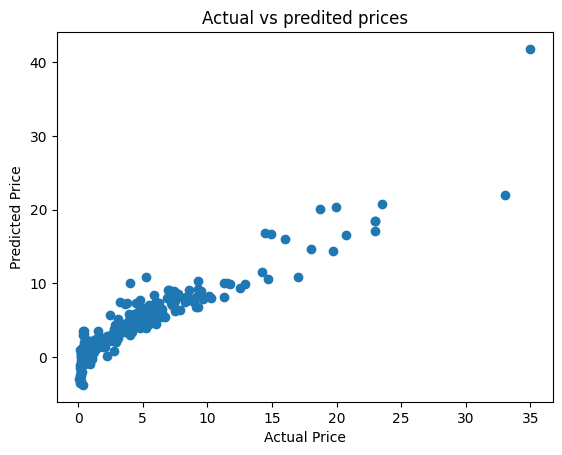

In [29]:
plt.scatter(y_train, trained_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs predited prices")

prediction on test data

In [31]:
test_data_prediction=lin_reg_model.predict(x_test)
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error or residual error : ", error_score)

R squared error or residual error :  0.8365766715027051


Text(0.5, 1.0, 'Actual vs predited prices')

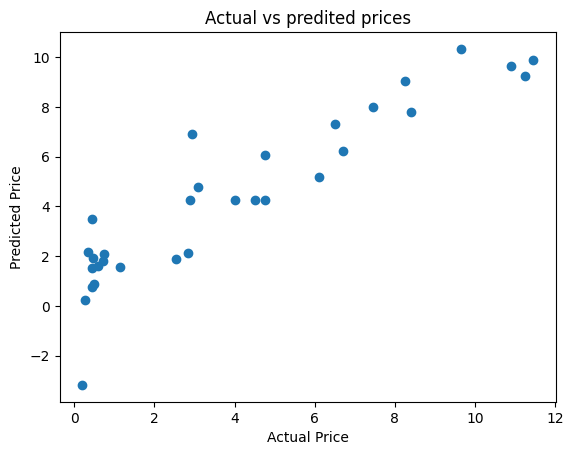

In [32]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs predited prices")
# aur jyaada data point hone chahiye the, toh aur accurate model banta

# Doing the same thongs with Lasso Refression

In [33]:
lasso_reg_model = Lasso()

In [35]:
lasso_reg_model.fit(x_train, y_train)

Lasso()

In [36]:
trained_data_prediction=lasso_reg_model.predict(x_train)
# comaparing the predicted values with the original value using mean square or R squared errors

In [37]:
# R squared error
error_score = metrics.r2_score(y_train, trained_data_prediction)
print("R squared error or residual error : ", error_score)
# this should be as low as possible, it is not accuracy %.

R squared error or residual error :  0.8427856123435794


Text(0.5, 1.0, 'Actual vs predited prices')

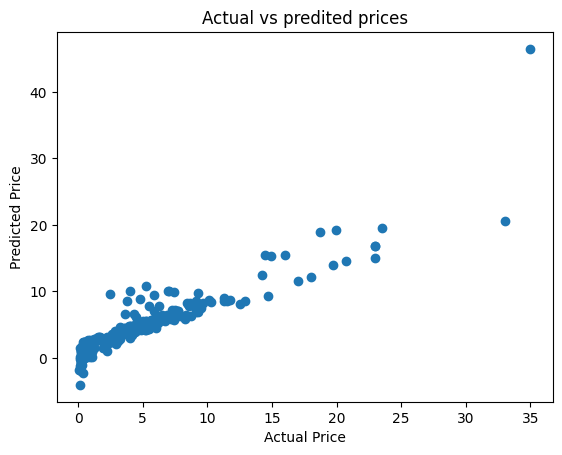

In [38]:
plt.scatter(y_train, trained_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs predited prices")

In [39]:
test_data_prediction=lasso_reg_model.predict(x_test)
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error or residual error : ", error_score)

R squared error or residual error :  0.8709167941173195


Text(0.5, 1.0, 'Actual vs predited prices')

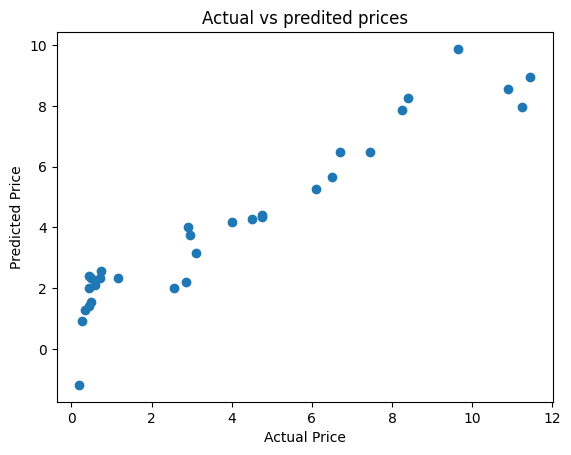

In [40]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs predited prices")
# aur jyaada data point hone chahiye the, toh aur accurate model banta

Making predictive System :

In [42]:
x_test.shape

(31, 7)

1. Using Linear regression first then Lasso



In [63]:
input_data=(2014,4.44,44444,1,0,0,0)
input_as_numpy_array=np.asarray(input_data)
input_reshaped=input_as_numpy_array.reshape(1,-1)

In [64]:
prediction=lin_reg_model.predict(input_reshaped)
print(prediction)


[4.98014322]
[3.11895496]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [60]:
x_test.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
99,2010,20.450,50024,1,0,0,0
161,2014,0.826,23000,0,1,0,0
89,2014,6.760,40000,0,0,0,0
30,2012,5.980,51439,1,0,0,0
232,2015,14.790,12900,0,0,1,0


In [61]:
y_test.head() # that is the selling prize

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
Name: Selling_Price, dtype: float64

In [62]:
lasso_prediction_selling_price = lasso_reg_model.predict(input_reshaped)
print(lasso_prediction_selling_price)

[3.11895496]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [57]:
# differnce is huge, let's try known values set
input_data=(2014,5.59,27000,0,0,0,0)
input_as_numpy_array=np.asarray(input_data)
input_reshaped=input_as_numpy_array.reshape(1,-1)
lin_reg_prediction=lin_reg_model.predict(input_reshaped)
print(lin_reg_prediction)
lasso_prediction_selling_price = lasso_reg_model.predict(input_reshaped)
print(lasso_prediction_selling_price)
# now correct prediction by both the models. Bs hme features sahi order me and sasi values ke sath dena hoga.
# dhyan rkhna is bat ka, as beech me ki gyi encoding, dropping, etc ka dhyan rkhna input feature dete smay

[3.83901354]
[3.8257306]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
